# KNN Algoritması




In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [56]:
data=pd.read_csv("data.csv")


In [39]:
data.head()
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [57]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [41]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [58]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

In [43]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
diagnosis                  212 non-null object
radius_mean                212 non-null float64
texture_mean               212 non-null float64
perimeter_mean             212 non-null float64
area_mean                  212 non-null float64
smoothness_mean            212 non-null float64
compactness_mean           212 non-null float64
concavity_mean             212 non-null float64
concave points_mean        212 non-null float64
symmetry_mean              212 non-null float64
fractal_dimension_mean     212 non-null float64
radius_se                  212 non-null float64
texture_se                 212 non-null float64
perimeter_se               212 non-null float64
area_se                    212 non-null float64
smoothness_se              212 non-null float64
compactness_se             212 non-null float64
concavity_se               212 non-null float64
concave points_se          212 n

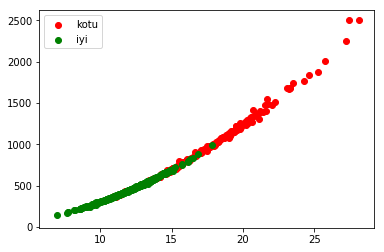

In [44]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="kotu")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="iyi")
plt.legend()
plt.show()


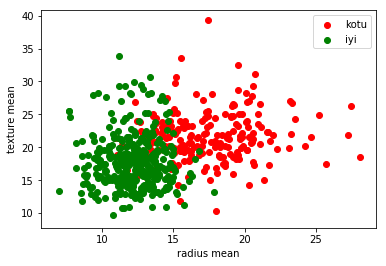

In [45]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi")
plt.xlabel("radius mean")
plt.ylabel("texture mean")
plt.legend()
plt.show()

In [59]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1) 


In [60]:
# normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [61]:
#train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [62]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [65]:
print("score:",knn.score(x_test,y_test))

score: 0.9532163742690059


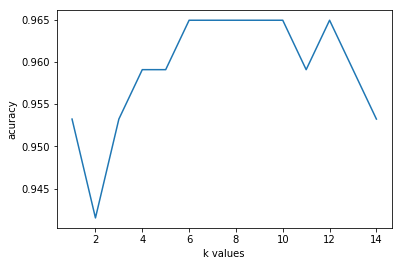

In [67]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("acuracy")
plt.show()

In [ ]:
#k degeri eğer 8 ise en iyi test sonuclarına ulasırız